# Stress Testing Common XAI Algos in the Literature

In [1]:
import pandas as pd
import numpy as np
import lime
import os
import numpy as np

from Classifiers import Classifier

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from pyAgrum.lib.bn2roc import showROC, showPR, showROC_PR

SMALL_SIZE = 10
MEDIUM_SIZE = 12
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

sns.set()

/var/folders/8j/jql_tttd2zg2dtk72cy8h9cc0000gn/T/ipykernel_82717/1095695072.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Case #1: Data Generated from a Common Cause Structure with Independent Vars

The purpose of this test is to understand how current algorithms of the literature such as LIME and SHAP can represent feature in important in situations where data is generated from a common cause structure. We also added an independent variable to understand if this variable will be considered as relevant to the algorithm. We will train an XGboost classifier with data generated from the model below and run XAI algortihms to understand the computed feature importance.

<img src="https://raw.githubusercontent.com/catarina-moreira/XAI_Algos/0de91f13187c7a136676e049804c6b6e4de3ff44/networks/common_cause.png" />

In [2]:
# load the common cause data
data_common_cause = pd.read_csv(os.path.join("gen_data", "common_cause_v3.dat"))
data_common_cause.head()

,X1,X2,Y
0,0.162166,0,0
1,0.724821,1,0
2,0.784591,1,1
3,0.216756,0,0
4,0.828123,0,1


In [3]:
clf = Classifier("XGBoost", "common_cause_v3", data_common_cause, "Y")
xgb = clf.applyClassifer()


[0]	validation_0-mlogloss:0.68324	validation_1-mlogloss:0.68325
[1]	validation_0-mlogloss:0.67351	validation_1-mlogloss:0.67355
[2]	validation_0-mlogloss:0.66398	validation_1-mlogloss:0.66404
[3]	validation_0-mlogloss:0.65464	validation_1-mlogloss:0.65472
[4]	validation_0-mlogloss:0.64547	validation_1-mlogloss:0.64557
[5]	validation_0-mlogloss:0.63648	validation_1-mlogloss:0.63657
[6]	validation_0-mlogloss:0.62766	validation_1-mlogloss:0.62777
[7]	validation_0-mlogloss:0.61900	validation_1-mlogloss:0.61910
[8]	validation_0-mlogloss:0.61051	validation_1-mlogloss:0.61062
[9]	validation_0-mlogloss:0.60216	validation_1-mlogloss:0.60227
[10]	validation_0-mlogloss:0.59397	validation_1-mlogloss:0.59408
[11]	validation_0-mlogloss:0.58592	validation_1-mlogloss:0.58603
[12]	validation_0-mlogloss:0.57802	validation_1-mlogloss:0.57812
[13]	validation_0-mlogloss:0.57027	validation_1-mlogloss:0.57036
[14]	validation_0-mlogloss:0.56264	validation_1-mlogloss:0.56273
[15]	validation_0-mlogloss:0.55515	

In [4]:
clf_bn = Classifier("Bayesian Network", "common_cause_v2", data_common_cause, "Y")
bnc = clf_bn.applyClassifer(learningMethod="GHC")


Overall Performace: 
	Classifier: Bayesian Network
	Accuracy: 0.992
	Precision: 1.0
	Recall: 0.9844559585492227
	F1 Score: 0.9921671018276762


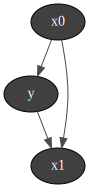

In [5]:
gnb.showBN(bnc.bn)

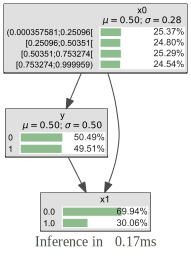

In [6]:
gnb.showInference(bnc.bn)

In [7]:
clf_nn = Classifier("Neural Network", "common_cause_v2", data_common_cause, "Y")
NN = clf_nn.applyClassifer()
NN


Epoch 1/50


2022-07-07 17:09:44.102032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


110/110 [==============================] - 1s 2ms/step - loss: 0.2979 - accuracy: 0.9149 - val_loss: 0.0854 - val_accuracy: 0.9947
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9803 - val_loss: 0.0373 - val_accuracy: 0.9960
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9774 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.9826 - val_loss: 0.1067 - val_accuracy: 0.9587
Epoch 5/50
110/110 [==============================] - 0s 975us/step - loss: 0.0801 - accuracy: 0.9757 - val_loss: 0.0281 - val_accuracy: 0.9893
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9780 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9886 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 8/50
110/

### Training a Neural Network Classifier


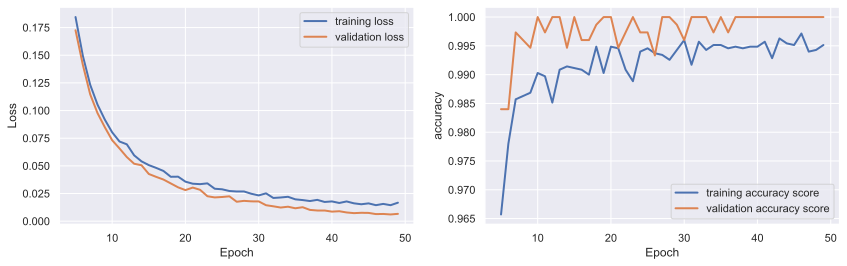

In [ ]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training accuracy score')
plt.plot(logs.loc[5:,"val_accuracy"], lw=2, label='validation accuracy score')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()

### Training an XGBoost Classifier

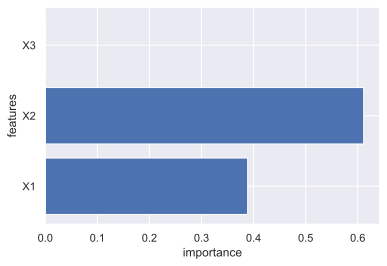

In [ ]:
def plot_feature_importances(model):
      n_features = X.shape[1]
      plt.barh(range(n_features),model.feature_importances_,align="center")
      plt.yticks(np.arange(n_features),X)
      plt.xlabel("importance")
      plt.ylabel("features")
      plt.show

plot_feature_importances(xgb)
   

### Generating Explanations for XGBoost

In [ ]:
from  lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train, feature_names=features, class_names=["Y:0", "Y:1"])
explainer

Prediction: 1


/usr/local/anaconda3/envs/python_base/lib/python3.10/site-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


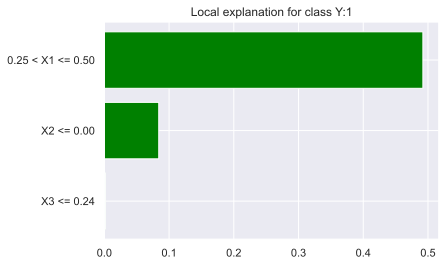

In [ ]:
indx = 5

res = xgb.predict_proba([X_test[indx]])
print( "Prediction: " + str(np.argmax(res[0])) )

exp = explainer.explain_instance(X_test[indx], xgb.predict_proba, num_features=3)
fig = exp.as_pyplot_figure()

### Generating Explanations for Neural Net


In [ ]:
from  lime.lime_tabular import LimeTabularExplainer
explainer_nn = LimeTabularExplainer(X_train, feature_names=features, class_names=["Y:0", "Y:1"])
explainer_nn

In [ ]:
predict_fn = lambda x:  1.0 if nn.predict(x) >= 0.5 else 0.0

157/157 [==============================] - 0s 608us/step


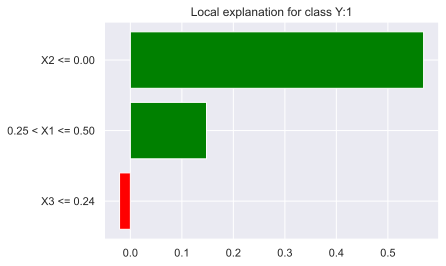

In [ ]:
indx = 5

instance1 =  np.expand_dims(X_test[indx], axis=0) 
instance2 =  X_test[indx]

exp = explainer.explain_instance(X_test[indx], nn.predict, num_features=3)
fig = exp.as_pyplot_figure()

In [ ]:
explainer_bn = LimeTabularExplainer(X_train, feature_names=features, class_names=["Y:0", "Y:1"])
explainer_bn

In [ ]:
indx = 5

instance1 =  np.expand_dims(X_test[indx], axis=0) 
instance2 =  X_test[indx]

exp = explainer_bn.explain_instance(X_test[indx], clf.predict_proba, num_features=3)
fig = exp.as_pyplot_figure()

OutOfBounds: [pyAgrum] Out of bound error: label '0.9999999999883493' is unknown in X2:Labelized({0.0|1.0})